In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
list_url = ['https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/application_record-1.csv',
            'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/application_record-2.csv',
            'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/application_record-3.csv']

df = pd.concat([pd.read_csv(f) for f in list_url],ignore_index=True)

In [3]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
df.shape

(438557, 18)

In [5]:
df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'code_gender', 'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'days_birth',
       'days_employed', 'flag_mobil', 'flag_work_phone', 'flag_phone',
       'flag_email', 'occupation_type', 'cnt_fam_members'],
      dtype='object')

## **Mission 1**

In [7]:
df[['days_birth', 'days_employed']].sample(10)

,days_birth,days_employed
338865,-23407,-781
55294,-22884,365243
231364,-15822,-2511
16652,-17850,-2014
177572,-12384,-822
383993,-10818,-3349
169444,-20116,365243
427455,-17999,-5700
281788,-23164,365243
10296,-16367,-5070


In [8]:
df_days = df[['days_birth', 'days_employed']].copy()
df_days.shape

(438557, 2)

In [9]:
df_days_active = df_days[df_days.days_employed < 0]

In [10]:
df_days_active.head()

,days_birth,days_employed
0,-12005,-4542
1,-12005,-4542
2,-21474,-1134
3,-19110,-3051
4,-19110,-3051


In [11]:
(df_days_active['days_birth'] > 0).sum()

0

In [12]:
df_days_active['days_birth'] = np.abs(df_days_active['days_birth'])
df_days_active['days_employed'] = np.abs(df_days_active['days_employed'])
df_days_active.head()

,days_birth,days_employed
0,12005,4542
1,12005,4542
2,21474,1134
3,19110,3051
4,19110,3051


In [13]:
df_days_active.duplicated().sum() / df_days_active.shape[0]

0.7975541533141718

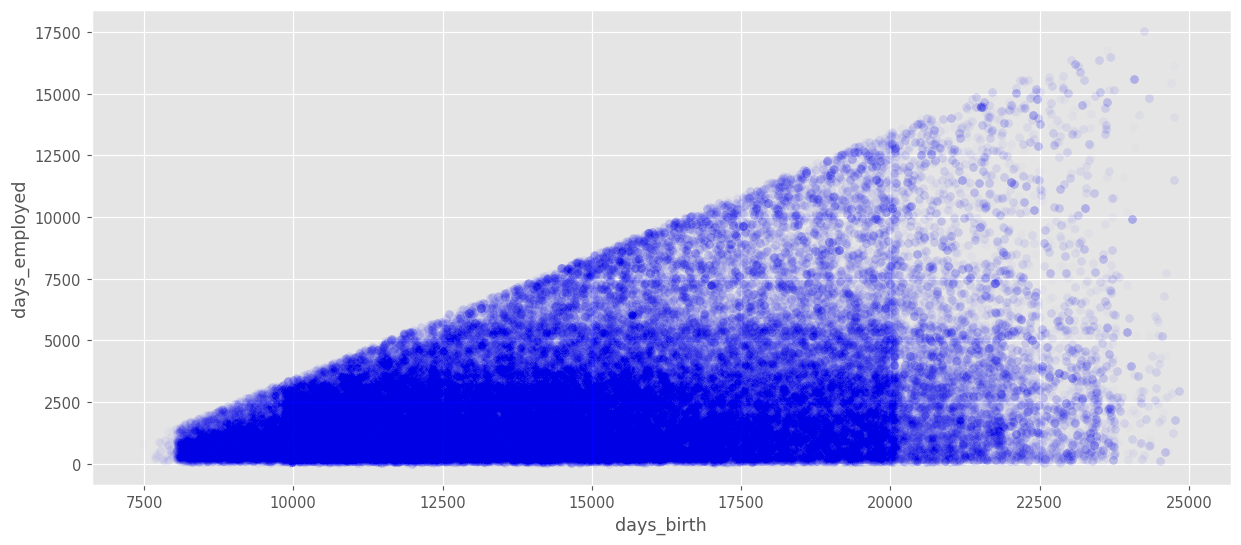

In [14]:
plt.figure(figsize=(14, 6), dpi=105)
sns.scatterplot(x='days_birth', y='days_employed', data=df_days_active,
                alpha=0.01, lw=1.5, color='b'
                );

## **Mission 2**

In [15]:
df_days.shape

(438557, 2)

In [16]:
12005 / 365

32.89041095890411

In [17]:
df_days['days_birth'] = np.abs(df_days['days_birth']) / 365
df_days.head()

,days_birth,days_employed
0,32.890411,-4542
1,32.890411,-4542
2,58.832877,-1134
3,52.356164,-3051
4,52.356164,-3051


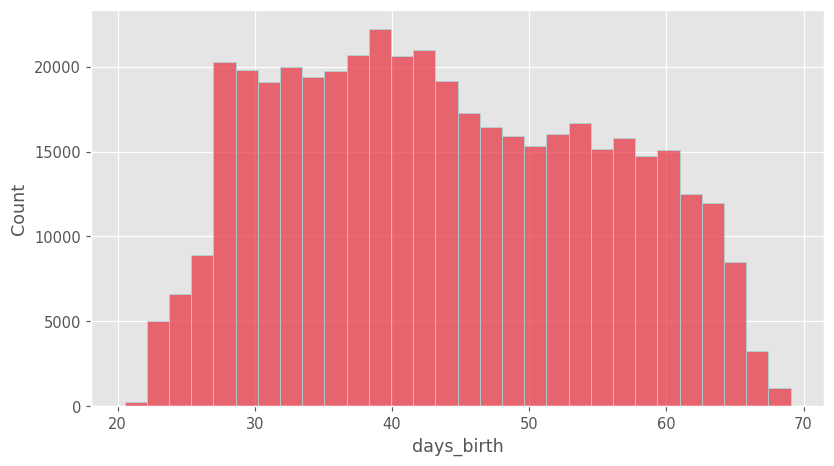

In [18]:
plt.figure(figsize=(9, 5), dpi=105)

sns.histplot(x='days_birth', data=df_days,
            bins=30, color='#e63946',
            edgecolor='#a8dadc')
plt.show()

## **Mission 3**

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
cnt_children,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
amt_income_total,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
days_birth,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
days_employed,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
flag_mobil,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
flag_work_phone,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
flag_phone,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
flag_email,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
cnt_fam_members,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


In [20]:
df.columns

Index(['id', 'code_gender', 'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'days_birth',
       'days_employed', 'flag_mobil', 'flag_work_phone', 'flag_phone',
       'flag_email', 'occupation_type', 'cnt_fam_members'],
      dtype='object')

In [21]:
df_bottom_half_employees = df[['amt_income_total', 'name_family_status', 'flag_own_realty']].copy()
df_bottom_half_employees.head()

,amt_income_total,name_family_status,flag_own_realty
0,427500.0,Civil marriage,Y
1,427500.0,Civil marriage,Y
2,112500.0,Married,Y
3,270000.0,Single / not married,Y
4,270000.0,Single / not married,Y


In [22]:
df_bottom_half_employees.shape

(438557, 3)

In [23]:
df_bottom_half_employees = (
    df_bottom_half_employees[df_bottom_half_employees['amt_income_total'] < df_bottom_half_employees['amt_income_total'].median()]
)

In [24]:
df_bottom_half_employees.shape

(219272, 3)

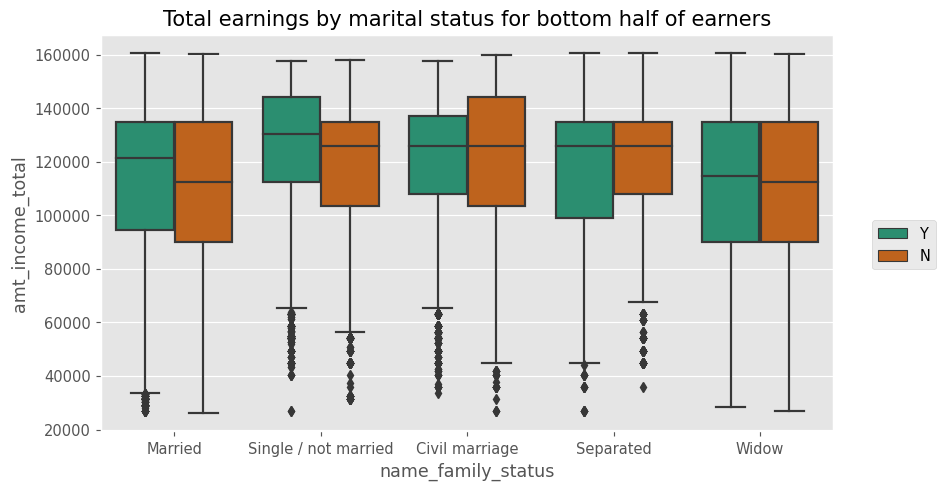

In [25]:
plt.figure(figsize=(9, 5), dpi=105)
plt.title('Total earnings by marital status for bottom half of earners')
sns.boxplot(y='amt_income_total', x='name_family_status', 
            data=df_bottom_half_employees,
            hue='flag_own_realty',
            palette='Dark2')
plt.legend(bbox_to_anchor=(1.15, 0.55))
plt.show()

## **Mission 4**

In [26]:
from sklearn.compose import make_column_selector as selector

numerical = selector(dtype_include=np.number)(df)
numerical

['id',
 'cnt_children',
 'amt_income_total',
 'days_birth',
 'days_employed',
 'flag_mobil',
 'flag_work_phone',
 'flag_phone',
 'flag_email',
 'cnt_fam_members']

In [27]:
df[numerical].head()

,id,cnt_children,amt_income_total,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,cnt_fam_members
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0


In [28]:
df['flag_mobil'].value_counts()

1    438557
Name: flag_mobil, dtype: int64

In [29]:
df.drop(['id','flag_mobil'], axis=1).corr()

,cnt_children,amt_income_total,days_birth,days_employed,flag_work_phone,flag_phone,flag_email,cnt_fam_members
cnt_children,1.000000,0.019177,0.349088,-0.241535,0.038418,-0.038266,0.028457,0.884781
amt_income_total,0.019177,1.000000,0.053775,-0.141291,-0.033635,0.004444,0.112139,0.011454
days_birth,0.349088,0.053775,1.000000,-0.617908,0.171829,-0.037984,0.096752,0.306179
days_employed,-0.241535,-0.141291,-0.617908,1.000000,-0.232208,0.004868,-0.074372,-0.234373
flag_work_phone,0.038418,-0.033635,0.171829,-0.232208,1.000000,0.290066,-0.060915,0.049777
flag_phone,-0.038266,0.004444,-0.037984,0.004868,0.290066,1.000000,-0.001170,-0.024213
flag_email,0.028457,0.112139,0.096752,-0.074372,-0.060915,-0.001170,1.000000,0.022054
cnt_fam_members,0.884781,0.011454,0.306179,-0.234373,0.049777,-0.024213,0.022054,1.000000


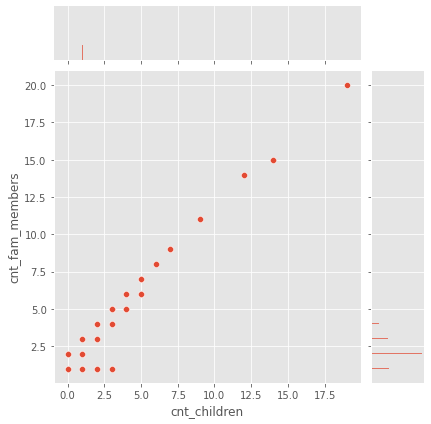

In [30]:
sns.jointplot(x='cnt_children', y='cnt_fam_members',data=df)

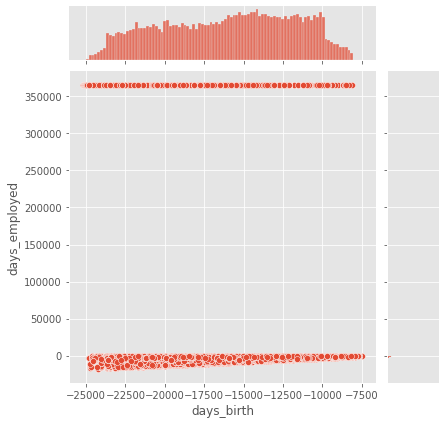

In [31]:
sns.jointplot(x='days_birth', y='days_employed',data=df)

In [32]:
numerical = [
 'cnt_children',
 'amt_income_total',
 'days_birth',
 'days_employed',
 'flag_work_phone',
 'flag_phone',
 'flag_email',
 'cnt_fam_members'
 ]

df['days_employed'] = np.abs(df.days_employed)
df['days_birth'] = np.abs(df.days_birth)

In [33]:
df[numerical].sample(8)

,cnt_children,amt_income_total,days_birth,days_employed,flag_work_phone,flag_phone,flag_email,cnt_fam_members
372340,2,112500.0,10862,155,1,0,0,4.0
257672,0,292500.0,18232,1573,0,1,0,2.0
297330,0,112500.0,18404,10753,1,1,0,2.0
98185,1,202500.0,12855,1919,0,1,1,3.0
145008,1,112500.0,14526,7579,0,0,0,3.0
55758,0,337500.0,21666,365243,0,0,0,2.0
13333,1,337500.0,14408,431,0,0,0,2.0
7501,0,225000.0,15000,1117,0,0,1,2.0


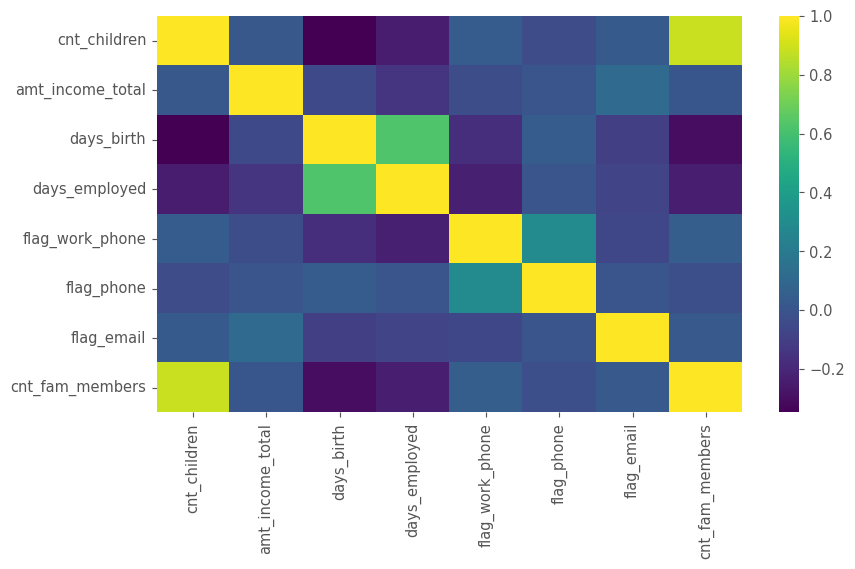

In [34]:
plt.figure(figsize=(9, 5), dpi=105)
sns.heatmap(df[numerical].corr(), cmap="viridis")
plt.show()